# k -Nearest Neighbors

K-nearest neighbors (KNN) Is a type of supervised learning algorithm which Is used for both regression and classification
purposes, but mostly it is used for the later. Given a dataset with different classes, KNN tries to predict the correct class of test
data by calculating the distance between the test data and all the training points. It then selects the k points which are closest
to the test data. Once the points are selected, the algorithm calculates the probability (in case of classification) of the test point
belonging to the classes of the k training points and the class with the highest probability is selected. In the case of a
regression problem, the predicted value is the mean of the k selected training points.

**We have to select k = any number , which means the test data will find its k nearest neighbors. It is advised that k should be odd number always , because in even is is possibility that there are exactly half half nearest training points , so it will be difficult to predict class of test data , as both training points will give 50-50% of chances.**

**Let's understand with illustration:**

 Given a training dataset as given below . We have a new test data (?) that we need to assign to one of the two classes (i.e training points of different classes).

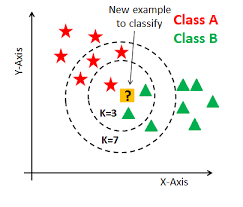


**Here if k =3  , then it gonna find 3 nearest neighbors of test data , and then check the probability of both the classes. As if there are one red and two green nearest neighbors of test data , then probability of red will be 1/3 and probability of green will be 2/3 , so the class with more probability will be predicted as test data. so here probaility of green is more , so acc. to prediction test data is of green class.**

Similarly , if this were the case of a regression problem , the predicted value for the test data will simply the mean of all the 3 nearest values.

This is the basic working algorithm of k-NN . let's understand how the distance is calculated.

# Euclidean Distance:

It is the most commonly used method to calculate the distance between two points. The Euclidean Distance between two points p(p1,p2) , q(q1,q2) is calculates as:

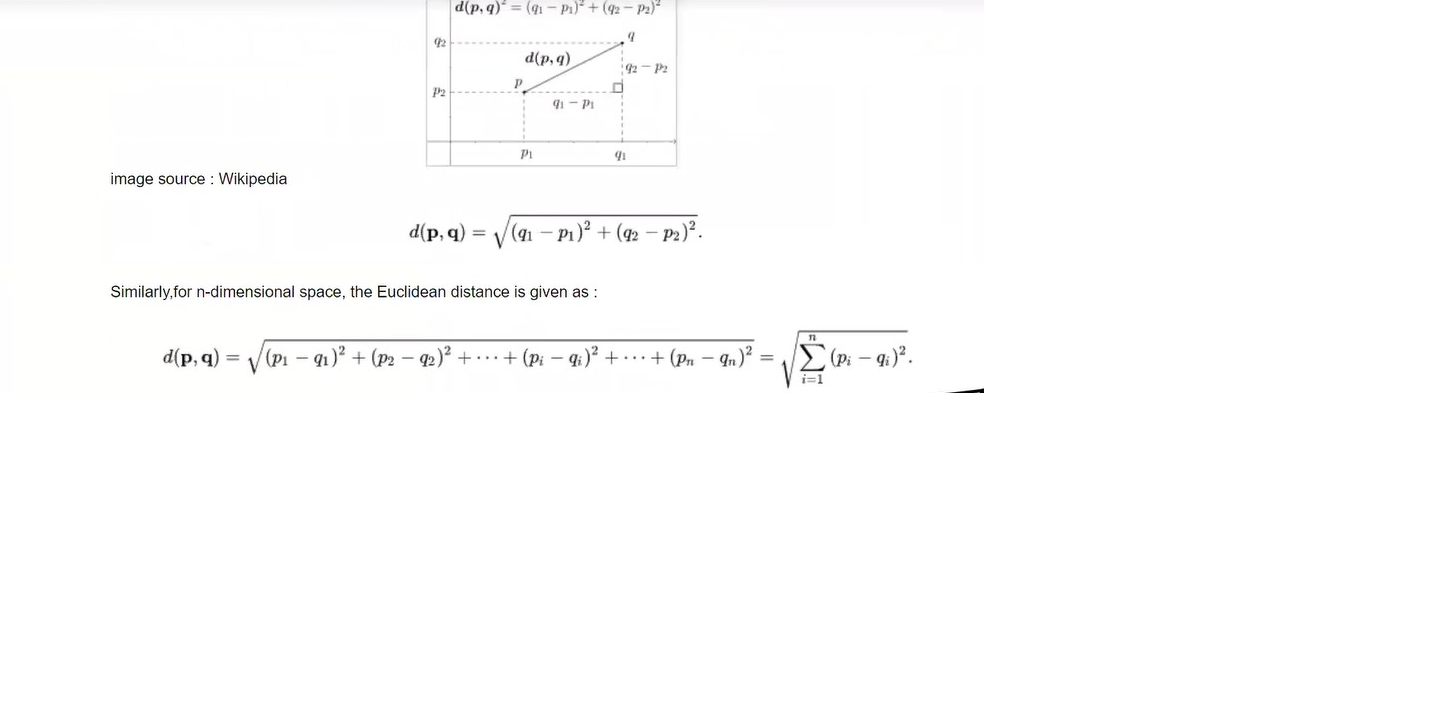

**Lazy Learners:**

k-NN algorithms are often termed as Lazy learners. Let's understand why is that. Most of the algorithms like Bayesian
classification, logistic regression, SVM etc., are called Eager learners. These algorithms generalize over the training set before receiving the test data i.e. they create a model based on the training data before receiving the test data and then do the prediction/classification on the test data. But this is not the case with the k-NN algorithm. It doesn’t create a generalized model for the training set but waits for the test data. Once test data is provided then only it starts generalizing the training data to classify the test data. **So, a lazy learner just stores the training data and waits for the test set. Such algorithms work less while training and more while classifying a given test dataset.**


**In short , if we give training data to KNN to get trained then it will just store the data in memory , without getting trained . But when we give test data to Knn and asked KNN to predict , then it will go to memory , recieve that stored data and start working on prediction , because now it has to do this task. But at the time of training , it was lazy and just stored the data in memory.**

# Pros ans Cons. Of k-NN Algorithm

**Pros:**

* It can be used for both regression and classification problems.

* It is very simple and easy to implement.

* Mathematics behind the algorithm is easy to understand.

* There is no need to create model or do hyperparameter tuning.

* KNN doesn't make any assumption for the distribution of the given data.

* There is not much time cost in training phase.

**Cons:**

* Finding the optimum value of ‘k”

* It takes a lot of time to compute the distance between each test sample and all training samples.

* Since the model is not saved beforehand in this algorithm (lazy learner), so every time one predicts a test value, it follows the same steps again and again

* Since, we need to store the whole training set for every test set, it requires a lot of space.

* It is not suitable for high dimensional data.

* Expensive in testing phase


Let's Start with one dataset Related to Breast Cancer , there are two types of cancer here 1. Malignant tumor(MT) and 2 . Benign Tumor(BT).

In [7]:
# Import necessary libraries:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.neighbors import KNeighborsClassifier  # for regression use KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# import plotly

import warnings
warnings.filterwarnings('ignore')


In [8]:
# Get CSV data from Training Ml  and print head

df =pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv' , index_col =0 )
df.head()

# index_col =0 is used to remove index and start with next column.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# print summary

print(df.shape)

print('_______')

print(df.info())

(569, 32)
_______
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  a

**Now here in the last column(feature) which is un-named has all nan- values so it is safe to remove/drop this feature.**

In [10]:
df = df.drop(['Unnamed: 32'] , axis =1)

In [11]:
# DataFrame Statistics:

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# to check sum of null values in each feature. 

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Seems no other columns have null values . it is safe to proceed.

In [13]:
# To check whether dataset is imbalanced or not:

df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**It seems ratio is quite correct so dataset is not imbalanced , we are good to proceed.**

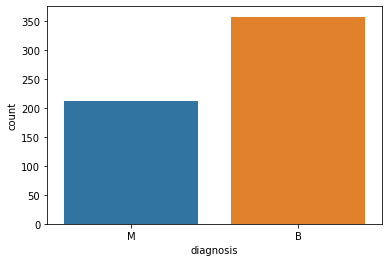

In [14]:
# Plot each class Frequency:

sns.countplot(x ='diagnosis',data = df)
plt.show()

In [15]:
df.shape

(569, 31)

# Using SelectKBest feature selection Method:

**As there are 30 Features and 1 label(i.e Diagnosis)  , so all features are related to label??**

So , SelectKBest use f_classif function to find best features  , where f_classif uses ANOVA test.

**and here K in SelectKBest is any number or how many best features we wanna find.**

In [16]:
from sklearn.feature_selection import SelectKBest , f_classif

In [17]:
# Replace label column (diagnosis) into binary codes 0 and 1.

df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [18]:
X = df.drop('diagnosis' , axis =1)
y = df.diagnosis

In [19]:
best_features = SelectKBest(score_func = f_classif , k=17) # here k is randomly chosen out of 30 features , how many best we want.

fit = best_features.fit(X,y)     # .fit : Understand relation of each features with label one by one

df_scores = pd.DataFrame(fit.scores_) # .scores_: it wil get the scores of all values of k , based on what it undrstood by .fit. and convert into DataFrame

df_columns = pd.DataFrame(X.columns) # Create one DataFrame for all the columns i.e 17 best features.

# Concatenate DataFrames: To keep two DataFrames in one DataFrame.

features_scores = pd.concat([df_columns , df_scores],axis=1) # axis=1 means concatenate column wise.

features_scores.columns = ['Feature_name','Score']  # Name output columns / name two DataFrames.

print(features_scores.nlargest(17 , 'Score'))  # print 17 best features acc. to largest score first.

            Feature_name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


# Model Building:

**Here we will take only best 17 features in X, and named as new_X.**

In [20]:
new_X = df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean',
           'area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se',
           'texture_worst','smoothness_worst']]

In [21]:
new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [22]:
# To standardize or Scaling the data:

Scaler = StandardScaler()
X_scaler = Scaler.fit_transform(new_X)

In [23]:
# Building Model to test unexposed Data:

x_train , x_test , y_train , y_test = train_test_split(X_scaler ,y , test_size = 0.25 , random_state = 355)

**Now we have to test again and again , if the data changes or there is any variation. so we have to repeat all steps again and again ,so for easiness let's make the code smaller and define a function , if you need this again just recall the function , not have to define everything again and again.**

In [27]:
# Write one function and call as many as times to check accuracy_scores of different models:

def metric_score(clf , x_train , x_test , y_train , y_test , train=True):
    if train:
        y_pred = clf.predict(x_train)

        print("\n==============Train Result==========")
        
        print(f"=======accuracy_score:{accuracy_score(y_train , y_pred)*100:.2f}%")
        
    elif train ==False:
        
        pred = clf.predict(x_test)
        
        print("\n===============Test Result===========")
        
        print(f"accuracy_score:{accuracy_score(y_test , pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test ,pred,digits=2)) #Model confindence/accurcy.

 **here cls is classification model , which we passed as argument.**
 
 **Then we passed training and testing data as x_traun , x_test , y_train,y_test**
 
 **Then we set train = True , means            **
 
 **Then firstly , in 'if' condition we are checking training , if train = True then control will go inside.**
 
 **Now if train = True , means model is already trained its time to predict.take that clf model and predict x_train ,that how good it is trained. and save in y_pred.**
 
 **So accuracy score basically gives training score that how good model is trained/learned.and after then to convert in percent just multiplying by 100 (Optional).**
 
 **if train ==false , then control will go to elif part , and it will test data.**
 
 **At last , just generate classification report on test , this will give how good is model or how accurate is model.**
 
 **digits = 2 , means how many digits we want after decimal in output.**

In [28]:
# Initiate KNeighborsClassifier : As we initiate linear regression or logistic regression

knn = KNeighborsClassifier()

# Model Training;

knn.fit(x_train , y_train)

KNeighborsClassifier()

In [29]:
# Call the function and pass the Dataset to check train and test score.

metric_score(knn, x_train , x_test, y_train , y_test,train = True)  # This is for training score
metric_score(knn, x_train , x_test, y_train , y_test,train = False) # This is for testing score


==============Train Result==========
=======accuracy_score:98.83%

===============Test Result===========
accuracy_score:95.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



**accuracy_score of testing data will always be less than that of training data , because it has seen training data before because it is learned already, and testing data is new for this.**

# Cross Validation:

Suppose you train a model on a given dataset using any specific algorithm. You tried to find the accuracy of the trained model
using the same training data and found the accuracy to be 95% or maybe even 100%. What does this mean? Is your model
ready for prediction? The answer is no. Why? **Because your model has trained itself on the given data, ie. it knows the data
and it has generalized over it very well. But when you try and predict over a new set of data, it's most likely to give you very bad accuracy, because it has never seen the data before and thus it fails to generalizes well over it. This is the problem of
overfitting.**

**To tackle such problem, Cross-validation comes into the picture. Cross-validation is a resampling technique with a
basic idea of dividing the training dataset into two parts i.e. train and test. On one part(train) you try to train the model and on the second part(test) i.e. the data which is unseen for the model, you make the prediction and check how well your model
works on it. If the model works with good accuracy on your test data, it means that the model has not overfitted the training
data and can be trusted with the prediction, whereas if it performs with bad accuracy then our model is not to be trusted and
we need to tweak our algorithm.**

Let's see the different approaches of Cross-Validation:

**1. Hold Out Method**

It is the most basic of the CV techniques. It simply divides the dataset into two sets of training and test. The training dataset is used to train the model and then test data is fitted in the trained model to make predictions. We check the accuracy and assess our model on that basis. This method is used as it is computationally less costly. But the evaluation based on the Hold-out set can have a high variance because it depends heavily on which data points end up in the training set and which in test data. The evaluation will be different every time this division changes.

**Basically , it is same as train_test-split (which we have learned earlier and applying), so as here also , we're holding the x_test , y_test , and passing the x_train , y_train only.**


**2. k-fold Cross Validation: 

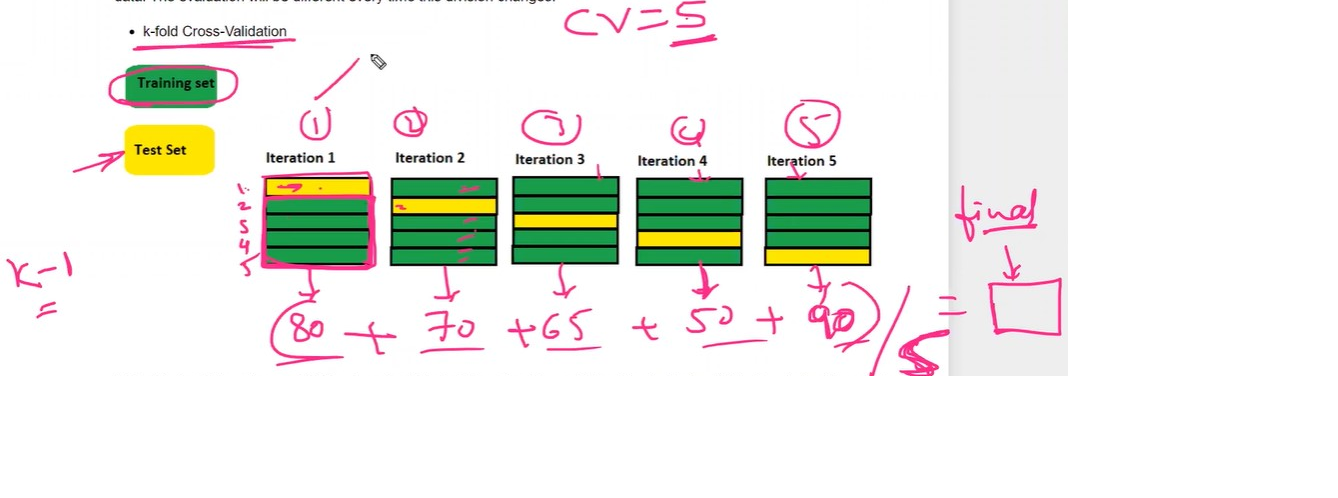

To tackle the high variance of Hold-out method, the k-fold method is used. The idea is simple, divide the whole dataset into ‘k’ sets preferably of equal sizes. Then the first set is selected as the test set and the rest ‘k-1' sets are used to train the data.

Error is calculated for this particular dataset. Then the steps are repeated, ie. the second set is selected as the test data, and the remaining ‘k-1' sets are used as the training data. Again, the error is calculated. Similarly, the process continues for ‘k’ times. In the end, the CV error is given as the mean of the total errors calculated individually, mathematically given as:
 
                    ***CV = 1/k Summation(sum of errors) for i =1 to k
 

The variance in error decreases with the increase in ‘k’. The disadvantage of k-fold cv is that it is computationally expensive as the algorithm runs from scratch for ‘k’ times.


**3. Leave one out Cross Validation(LOOCV):

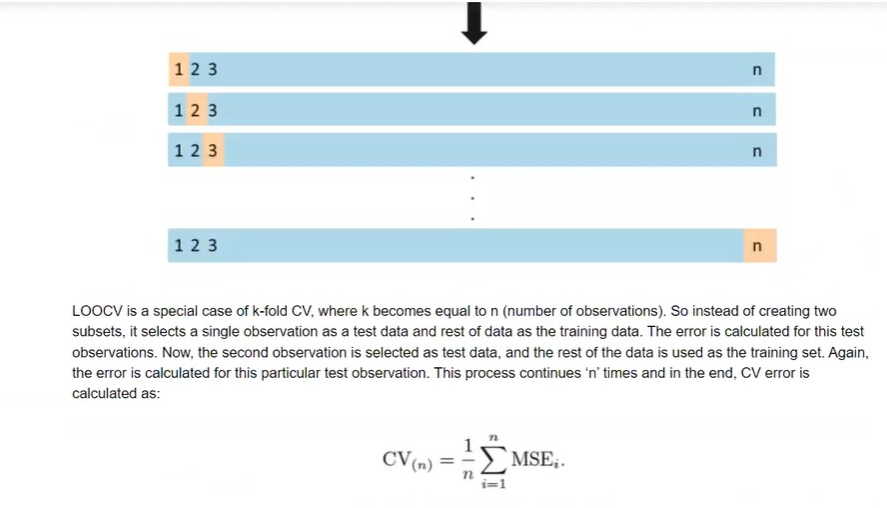

**In hold out method , we build a model only once based on training data which is fixed always like may be 75% or 80% like anything. In this method , Model only once trained and then keep passing that learned data for testing many times as required.**

But as the time passes , there can be some issues with this method , so to avoid any such situation , we gonna use k-fold cross validation.

**Now , if we want to learn/train our model 5 times(or more than once) , and test 5 times , then we gonna use k-fold , as in hold out , data can be trained only once.**

In [30]:
# k-fold method for Demo Purpose only:

from sklearn.model_selection import KFold , cross_val_score

k_f = KFold(n_splits =3)  # it means data gets trained 3 times , each time it get tests 3 times.

k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [31]:
for train , test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    
    print('train:',train ,'test:',test)

train: [4 5 6 7 8 9] test: [0 1 2 3]
train: [0 1 2 3 7 8 9] test: [4 5 6]
train: [0 1 2 3 4 5 6] test: [7 8 9]


In [35]:
# Cross validation score to check if the model is overfittig.

cross_val_score(knn , X_scaler ,y , cv=5) # cv=5 means it gonna train and test 5 times.


array([0.96491228, 0.96491228, 0.97368421, 0.98245614, 0.96460177])

In [37]:
# If we don't 5 scores , if we want only one score as mean of all.

cross_val_score(KNeighborsClassifier(),X_scaler,y,cv=5).mean()

0.9701133364384411

In [38]:
# Alternate:

cross_val_score(knn,X_scaler,y,cv=5).mean()

0.9701133364384411

**Important : More the value of CV , more will be wastage of time and money , and obviously time and money plays important role here.**

# Hyperparameter Tuning:

**Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. Every machine learning models will have different hyperparameters that can be set.**

**After all, machine learning is all about finding the right balance between computing time and the model’s performance.**

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.


**1. Grid Search:**

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn. This method tries every possible combination of each set of hyper-parameters. Using this method, we can find the best set of values in the parameter search space. This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

The parameter grid size will be a multiplication of all the parameters.


**Let's use GridSearch CV for the best parameter to improve the accuracy.**

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[3,5,6,7,8],
             'n_neighbors':[3,5,7,9,11,13]}


# Here knn is categorised as brute force method , and kd-tree method , so we taken both in algorithm.

In [41]:
grid_search =GridSearchCV(estimator =knn ,param_grid = param_grid)

In [42]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [43]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [44]:
# We will use the best parameters in our k-NN algorithm and check if accuracy is increasing.

knn = KNeighborsClassifier(algorithm = 'kd_tree',leaf_size = 3 , n_neighbors =3)
knn.fit(x_train , y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [45]:
# Call the function and pass dataset to check train and test score

metric_score(knn, x_train , x_test ,y_train ,y_test,train=True) # This is for Training score
metric_score(knn, x_train , x_test ,y_train ,y_test,train=False) # This is for Testing score



==============Train Result==========
=======accuracy_score:98.36%

===============Test Result===========
accuracy_score:95.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



**So here we observed that there is no much difference , it means model learned already as much as it can , there is no scope of improvements  , so even after hyperparameter tuning we getting this.**

**As training and testing score was already above 95% , so we can expect that there is no scope of improvemnets  but if it comes 70-75% or less than , and then after hyperparameter doesn't improve , so it is matter of thinking.**

In [47]:
# If you want to check the comfusion matrix then:

y_pred = knn.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[91,  2],
       [ 4, 46]], dtype=int64)

**Here we observed that type 1 error i.e 2 and type 2 error i.e 4 , are very small.That is the reason , we are getting 95.80 percentage in testing score and that's why accuracy score is also improved.**